<a href="https://colab.research.google.com/github/faryal-art/Fake_News_Detector/blob/main/Fake_News_Detector_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📰 Fake News Detection using Machine Learning

##  Introduction
This notebook demonstrates how machine learning can be used to detect fake news articles.  
We will load the dataset from kaggle, clean and preprocess the text, transform it into numerical features(vectorize it), train multiple models, and compare their performance.  

**Goals:**
- Identify whether a news article is Fake (0) or Real/True (1)
- Compare machine learning algorithms for best accuracy

## 1. Import  Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics  import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import re
import string

## 2 load dataset
* Dataset Used: Fake and Real news articles from Kaggle (Fake.csv and True.csv).
* Description:

   * fake.csv → contains fake news articles.

   *  true.csv → contains real news articles.



In [2]:
# installing opendatasets library so we can directly download the dataset form kaggle
!pip install opendatasets --quiet


In [3]:
# this will download dataset from kaggle using opendatasets library
import opendatasets as od
od.download('https://www.kaggle.com/datasets/jainpooja/fake-news-detection')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: faryalnishat7
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jainpooja/fake-news-detection


100%|██████████| 41.0M/41.0M [00:00<00:00, 1.13GB/s]

In [43]:

df_fake= pd.read_csv("./fake-news-detection/Fake.csv")
df_true= pd.read_csv("./fake-news-detection/True.csv")
#submission = pd.read_csv("fake-news/submit.csv")


## 📊 Data Exploration (EDA)
We start by exploring the dataset:
- Checking dataset shape
- Looking at first few rows
- Class distribution (Fake vs Real)


In [44]:
#Checking dataset shape
print(f"Shape of dataset which contain fake news:   {df_fake.shape}")
print(f"Shape of dataset which contain true news:   {df_true.shape}")


Shape of dataset which contain fake news:   (23481, 4)
Shape of dataset which contain true news:   (21417, 4)


In [5]:
#Looking at first few rows
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
#Class distribution (Fake(0) vs Real(1))
# creating a class column as a target feature
df_fake['class']=0
df_true['class']=1


In [8]:
print(f"Shape of dataset which contain true news: { df_true.shape}")
print(f"Shape of dataset which contain fake news: { df_fake.shape}")



Shape of dataset which contain true news: (21417, 5)
Shape of dataset which contain fake news: (23481, 5)


## 3. Seperating data for manual_testing
* Keep aside last 10 rows from each dataset for manual testing.
* Removing last 10 rows for manual testing

In [9]:
# remove last 10 rows for manual testing
df_true_manual_testing=df_true.tail(10)

# drop last 10 rows from original dataframe (df_true)
for i in range(21416,21406,-1):
  df_true.drop([i],axis=0,inplace=True)


# same as above for df_fake dataset
df_fake_manual_testing=df_fake.tail(10)


In [10]:
# same as above for df_fake dataset
df_fake_manual_testing=df_fake.tail(10)

for i in range(23480,23470,-1):
  df_fake.drop([i], axis=0, inplace=True)

In [11]:
print(f"Shape of dataset which contain true news after removing 10 rows: { df_true.shape}")
print(f"Shape of dataset which contain fake news after removing 10 rows: { df_fake.shape}")


Shape of dataset which contain true news after removing 10 rows: (21407, 5)
Shape of dataset which contain fake news after removing 10 rows: (23471, 5)


In [12]:
df_true_manual_testing['class']=1
df_fake_manual_testing['class']=0

/tmp/ipython-input-3763797267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing['class']=1
/tmp/ipython-input-3763797267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing['class']=0


In [13]:
df_true_manual_testing

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [14]:
df_fake_manual_testing

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


## 4. Merging true and fake news dataframes

* Merged true and fake news dataframes using `concat` method
* So the begning of new dataframethere  will be  all the true news
* At the end of  dataframe there will cbe all  fake news data

In [15]:
data_merge=pd.concat([df_true,df_fake], axis=0)
data_merge.tail(10)

,title,text,subject,date,class
23461,REPORT: ‘Federal Government Escalated the Viol...,KILLED: Rancher and protest spokesman Robert ...,Middle-east,"January 28, 2016",0
23462,"BOILER ROOM – Oregon Standoff, Cuddle Parties,...",Tune in to the Alternate Current Radio Network...,Middle-east,"January 28, 2016",0
23463,"Eyewitness Says Feds Ambushed Bundys, 100 Shot...",Patrick Henningsen 21st Century Wire UPDATE: 1...,Middle-east,"January 27, 2016",0
23464,Episode #119 – SUNDAY WIRE: ‘You Know the Dril...,Episode #119 of SUNDAY WIRE SHOW finally resum...,Middle-east,"January 24, 2016",0
23465,‘There’ll be boots on the ground’: US making n...,21st Century Wire says Various parties in Wash...,Middle-east,"January 23, 2016",0
23466,Boston Brakes? How to Hack a New Car With Your...,21st Century Wire says For those who still ref...,Middle-east,"January 22, 2016",0
23467,Oregon Governor Says Feds ‘Must Act’ Against P...,"21st Century Wire says So far, after nearly 20...",Middle-east,"January 21, 2016",0
23468,Ron Paul on Burns Oregon Standoff and Jury Nul...,21st Century Wire says If you ve been followin...,Middle-east,"January 21, 2016",0
23469,BOILER ROOM: As the Frogs Slowly Boil – EP #40,Tune in to the Alternate Current Radio Network...,Middle-east,"January 20, 2016",0
23470,Arizona Rancher Protesting in Oregon is Target...,RTOne of the most visible members of the armed...,Middle-east,"January 20, 2016",0


In [16]:
# columns present in merged dataframe
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## 5. Removing columns that are not relevant/important

In [17]:
df=data_merge.drop(['title','subject','date'],axis=1)

In [18]:
df.head()

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


## Bar plot of class counts

/tmp/ipython-input-726242592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette="Set2")


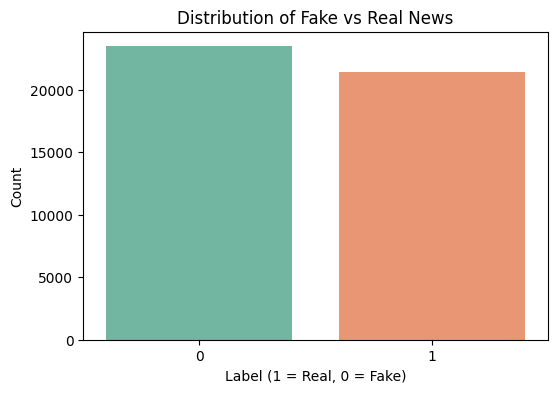

In [49]:

plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette="Set2")
plt.title("Distribution of Fake vs Real News")
plt.xlabel("Label (1 = Real, 0 = Fake)")
plt.ylabel("Count")
plt.show()

## 6. Text preprocessing and cleaning
* 6.1 Checking  null  values
* 6.2 Drop if null values are present
* 6.3 Ramdom Shuffling of data frame and  removing the indexs
* 6.4 Creating a Function to preprocess the text data

### 6.1 Checking null values

In [19]:
df.isnull().sum()

,0
text,0
class,0


### 6.3 Ramdom Shuffling of data frame and removing the indexs

* **Shuffling** the dataframe randomly mixes the true and fake news entries throughout the dataset, ensuring that the training and testing sets will have a balanced distribution of both classes

In [20]:
# Shuffling the indexes
df=df.sample(frac=1)

In [21]:
df.head()

,text,class
260,"WASHINGTON (Reuters) - The U.S. Congress, rush...",1
89,"WASHINGTON (Reuters) - Steny Hoyer, the No. 2 ...",1
16848,The results of this town s gun ownership manda...,0
19544,GREAT UPDATE! Three weeks after Hampshire Coll...,0
8694,"On January 17, Dallas News published a copy of...",0


In [22]:
# droping index column
df.reset_index(drop=True,inplace=True) # create a column for random shuffeled indexes


df.drop(['index'], axis=1, inplace=True)
 # this wil drop the entire index column

KeyError: "['index'] not found in axis"

In [ ]:
df.columns

In [ ]:
df=df.drop(['level_0'],axis=1)

In [ ]:
df.columns

In [ ]:
df

### 6.4 Creating a Function to preprocess the text data

To prepare text for machine learning:

* Turn the text into lower_case
* Remove all non-word character
* Remove URLs
* Remove HTML tags
* Remove punctuations
* Remove new line character  (\n)


* `text=re.sub('\[.*?]','',text)` -> used to remove citations like [1], [source].

* `re.sub("\\W"," ",text)`

   * Removes all non-word characters (anything except letters, digits, underscore).

   * Replaces them with a space.
*  `text=re.sub('https?://S+|www.\.\S+','',text)`
   * Remove URLs
* ` text=re.sub('<.*?>+','',text)`
    * Remove html tags
* ` text = re.sub('[%s]' % re.escape(string.punctuation), '', text)`
   * Remove punctuation

* `text = re.sub('\w*\d\w*', '', text)`
   * Remove words that contain numbers


In [24]:
df['text'] = df['text'].apply(preprocess_text)

In [53]:
def preprocess_text(text):
  text= text.lower()
  text=re.sub('\[.*?]','',text)
  text=re.sub('\\W',' ',text)
  text=re.sub('https?://\\S+|www\\.\S+','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text=re.sub('\n', '', text)
  text=re.sub('\w*\d\w*', '', text)
  return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-176865581.py:3: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?]','',text)
/tmp/ipython-input-176865581.py:5: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('https?://\\S+|www\\.\S+','',text)
/tmp/ipython-input-176865581.py:9: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub('\w*\d\w*', '', text)


In [54]:
# text after preprocessing
df['text']

,text
0,washington reuters the u s congress rush...
1,washington reuters steny hoyer the no d...
2,the results of this town s gun ownership manda...
3,great update three weeks after hampshire coll...
4,on january dallas news published a copy of t...
...,...
44873,washington reuters pennsylvania s attorney...
44874,it s bad enough that the oscar s this year don...
44875,what if you threw a party and most of the peop...
44876,washington reuters u s house speaker paul...


## 7. Splitting data into training and testing

* Split the data into training and testing sets
* We will use 80% of the data for training and 20% for testing

In [55]:

# Defing dependent and independent variables
x = df['text']
y = df['class']

# spliting training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## 8.Feature Engineering
Machine learning models require numerical features.  
* Vectorizing the text data

* Convert the text data into numerical feature vectors.

We will use:

* TfidfVectorizer to convert a collection of raw documents to a matrix of TF-IDF features.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## 9. Model building
* Train multiple machine learning models for comparison:
  * Logistic Regression
  * Decision Tree Classifier
  * Gradient Boosting Classifier
  * Random Forest Classifier

## ✅ Model Evaluation
We evaluate models using:
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix
- Classification Report



In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [58]:
# models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier()
}
# empty dictionary to store results of models
results ={}

for name,model in models.items():
  model.fit(xv_train,y_train)
  preds=model.predict(xv_test)
  acc=  accuracy_score(y_test,preds)
  results[name]=acc
  print(f"\n{name} Results:")
  print("Accuracy:", acc)
  print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
  print("Classification Report:\n", classification_report(y_test, preds))


Logistic Regression Results:
Accuracy: 0.9865196078431373
Confusion Matrix:
 [[4682   78]
 [  43 4173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4760
           1       0.98      0.99      0.99      4216

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976


Decision Tree Results:
Accuracy: 0.9968805704099821
Confusion Matrix:
 [[4745   15]
 [  13 4203]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4760
           1       1.00      1.00      1.00      4216

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976


Random Forest Results:
Accuracy: 0.9889705882352942
Confusion Matrix:
 [[4705   55]
 [  44 41

## 10 . Compare Performance

In [59]:
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("\nModel Comparison:\n")
print(results_df)


Model Comparison:

                 Model  Accuracy
0  Logistic Regression  0.986520
1        Decision Tree  0.996881
2        Random Forest  0.988971
3    Gradient Boosting  0.995655


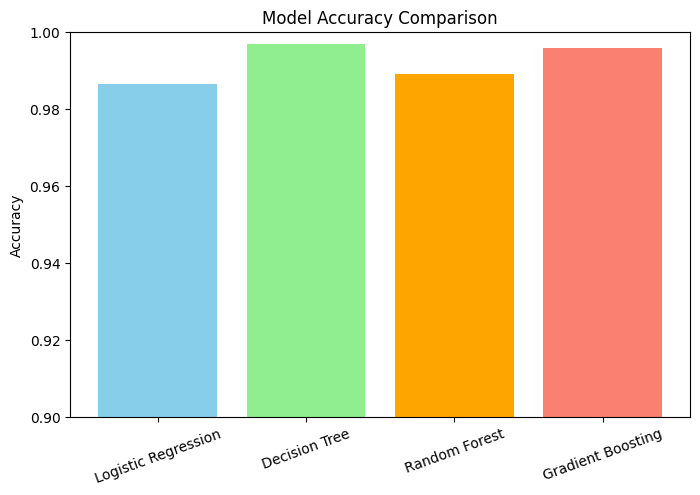

In [60]:
# Convert to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["Accuracy"], color=['skyblue', 'lightgreen', 'orange', 'salmon'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.ylim(0.9, 1.0)
plt.show()

## 11. Manual Testing
Now we test the model with some custom inputs to see how it performs on unseen text.


In [61]:
def manual_testing(news):
    test_news = preprocess_text(news)
    v_news = vectorization.transform([test_news]) # Pass as a list
    for name, model in models.items():
        pred = model.predict(v_news)
        if pred[0] == 0:
            print(f"\n📰 {name} Prediction:  Fake")
        else:
            print(f"\n📰 {name} Prediction:  Real")

In [62]:
df_true_manual_testing['text'].iloc[8]

'MOSCOW (Reuters) - Vatican Secretary of State Cardinal Pietro Parolin said on Tuesday that there was  positive momentum  behind the idea of Pope Francis visiting Russia, but suggested there was more work to be done if it were to happen.  Parolin, speaking at a joint news conference in Moscow alongside Russian Foreign Minister Sergei Lavrov, did not give any date for such a possible visit. The Eastern and Western branches of Christianity split apart in 1054. The pope, leader of the world s 1.2 billion Catholics, is seeking to improve ties, and last year in Cuba held what was the first ever meeting between a Roman Catholic pope and a Russian Orthodox patriarch.  Parolin said he had also used his talks in the Russian capital to also raise certain difficulties faced by the Catholic Church in Russia. He said that Moscow and the Vatican disagreed about the plight of Christians in certain parts of the world. He did not elaborate. Parolin, who is due later on Tuesday to meet Patriarch Kirill,

In [63]:
news=str(input())
manual_testing(news)


MOSCOW (Reuters) - Vatican Secretary of State Cardinal Pietro Parolin said on Tuesday that there was  positive momentum  behind the idea of Pope Francis visiting Russia, but suggested there was more work to be done if it were to happen.  Parolin, speaking at a joint news conference in Moscow alongside Russian Foreign Minister Sergei Lavrov, did not give any date for such a possible visit. The Eastern and Western branches of Christianity split apart in 1054. The pope, leader of the world s 1.2 billion Catholics, is seeking to improve ties, and last year in Cuba held what was the first ever meeting between a Roman Catholic pope and a Russian Orthodox patriarch.  Parolin said he had also used his talks in the Russian capital to also raise certain difficulties faced by the Catholic Church in Russia. He said that Moscow and the Vatican disagreed about the plight of Christians in certain parts of the world. He did not elaborate. Parolin, who is due later on Tuesday to meet Patriarch Kirill, 

In [64]:
# The news we are going to use for testing model
df_fake_manual_testing['text'].iloc[3]

'Paul Craig RobertsIn the last years of the 20th century fraud entered US foreign policy in a new way.  On false pretenses Washington dismantled Yugoslavia and Serbia in order to advance an undeclared agenda. In the 21st century this fraud multiplied many times. Afghanistan, Iraq, Somalia, and Libya were destroyed, and Iran and Syria would also have been destroyed if the President of Russia had not prevented it.  Washington is also behind the current destruction of Yemen, and Washington has enabled and financed the Israeli destruction of Palestine.  Additionally, Washington operated militarily within Pakistan without declaring war, murdering many women, children, and village elders under the guise of  combating terrorism.  Washington s war crimes rival those of any country in history.I have documented these crimes in my columns and books (Clarity Press). Anyone who still believes in the purity of Washington s foreign policy is a lost soul  Russia and China now have a strategic alliance

In [65]:
news=str(input())
manual_testing(news)

Paul Craig RobertsIn the last years of the 20th century fraud entered US foreign policy in a new way.  On false pretenses Washington dismantled Yugoslavia and Serbia in order to advance an undeclared agenda. In the 21st century this fraud multiplied many times. Afghanistan, Iraq, Somalia, and Libya were destroyed, and Iran and Syria would also have been destroyed if the President of Russia had not prevented it.  Washington is also behind the current destruction of Yemen, and Washington has enabled and financed the Israeli destruction of Palestine.  Additionally, Washington operated militarily within Pakistan without declaring war, murdering many women, children, and village elders under the guise of  combating terrorism.  Washington s war crimes rival those of any country in history.I have documented these crimes in my columns and books (Clarity Press). Anyone who still believes in the purity of Washington s foreign policy is a lost soul  Russia and China now have a strategic alliance 

In [66]:
df_fake_manual_testing['text'].iloc[5]

'21st Century Wire says As 21WIRE reported earlier this week, the unlikely  mishap  of two US Naval vessels straying into Iranian waters   just hours before the President s State of the Union speech, followed by the usual parade of arch-neocons coming on TV in real time to declare the incident as  an act of aggression  by Iran against the United States   is no mere coincidence.24 hours after the incident, the Iranians returned all 11 US sailors, unharmed and in good spirits. The only remaining casualty from this event was an incident of a common condition in Washington known as  Pre-Traumatic Stress Disorder    suffered by a certain US Senator was mortified by the uneventful outcome which followed Daniel McAdams Ron Paul Institute  The two US Navy riverine command boats intercepted in Iranian territorial waters yesterday were sent on their way along with the crew of 10 US sailors after brief detention on Iranian soil.According to news reports, the well-armed warships either suffered me

In [67]:
news=str(input())
manual_testing(news)

21st Century Wire says As 21WIRE reported earlier this week, the unlikely  mishap  of two US Naval vessels straying into Iranian waters   just hours before the President s State of the Union speech, followed by the usual parade of arch-neocons coming on TV in real time to declare the incident as  an act of aggression  by Iran against the United States   is no mere coincidence.24 hours after the incident, the Iranians returned all 11 US sailors, unharmed and in good spirits. The only remaining casualty from this event was an incident of a common condition in Washington known as  Pre-Traumatic Stress Disorder    suffered by a certain US Senator was mortified by the uneventful outcome which followed Daniel McAdams Ron Paul Institute  The two US Navy riverine command boats intercepted in Iranian territorial waters yesterday were sent on their way along with the crew of 10 US sailors after brief detention on Iranian soil.According to news reports, the well-armed warships either suffered mec

In [68]:
# the newa we are using to tes our model
df_true_manual_testing['text'].iloc[9]

'JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest economy is trying to promote its palm oil products amid threat

In [69]:
news=str(input())
manual_testing(news)

JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest economy is trying to promote its palm oil products amid threats

## 12.Choose te best model based on accuracy and classification metric

Model Comparison:

                 Model  Accuracy
0.     Logistic Regression  0.989862
1.       Decision Tree  0.995766
2.        Random Forest  0.994207
3.     Gradient Boosting  0.995878

* All models are performing extremely well (close to ~99% accuracy).
* Gradient Boosting Classifier (0.995878) performed slightly better than Decision Tree, Random Forest, and Logistic Regression.
* So we choose Gradient Boosting Classifier for deployment


## 🏆 Conclusion
- Gradient Boosting achieved the best accuracy (99.6%)  
- Logistic Regression, Random Forest also performed strongly  
- Improvements possible:
  - Hyperparameter tuning
  - Using deep learning models (LSTM, BERT)
  - Larger and more diverse datasets

This project shows how **NLP + Machine Learning** can effectively classify Fake vs Real news articles.


## Export Articrafts

In [70]:
import pickle

# saving gradient boosting classifier
pickle.dump(models['Gradient Boosting'],open('model.pkl','wb'))

# saving vectorizer
pickle.dump(vectorization,open('vectorizer.pkl','wb'))

## Export Articrafts

In [71]:
import pickle

# saving gradient boosting classifier
pickle.dump(models['Gradient Boosting'],open('model.pkl','wb'))

# saving vectorizer
pickle.dump(vectorization,open('vectorizer.pkl','wb'))

In [72]:
import pickle

# Save the vectorizer used for training
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorization, f)

# Save the trained model
with open("model.pkl", "wb") as f:
    pickle.dump(models['Gradient Boosting'], f)